# <span style=color:blue><b>SPRINT 7 - Tarea M7 T01</b></span>  

## Algoritmos de aprendizaje supervisado: Clasificación


**1. LOADING DATA:**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Open the choosen file
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 7. Algoritmos de aprendizaje supervisado Clasificación"
df = pd.read_csv(Archivo + '/wineData.txt', header = None)

**2. READING DATA:**

* These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three     different cultivars.  
* The analysis determined the quantities of 13 constituents found in each of the three types of wines.
* NOTE: 1st attribute is class identifier (1-3). **(Target)**

In [3]:
#The attributes are:
dataNames = ['class_identifier', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
             'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
             'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [4]:
df.columns = [dataNames]

In [5]:
print ('- El dataset contiene', df.shape, 'filas y columnas respectivamente.')
print ('- ¿Existen datos nulos?:', df.isnull().values.any())
print ('- ¿Existen datos faltantes/ erroneos?:', df.isnull().values.any())

- El dataset contiene (178, 14) filas y columnas respectivamente.
- ¿Existen datos nulos?: False
- ¿Existen datos faltantes/ erroneos?: False


In [6]:
df.dtypes

class_identifier                  int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
dtype: object

In [7]:
df.head()

,class_identifier,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
class_identifier,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
malic_acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
alcalinity_of_ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
total_phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
nonflavanoid_phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


<Figure size 432x288 with 0 Axes>

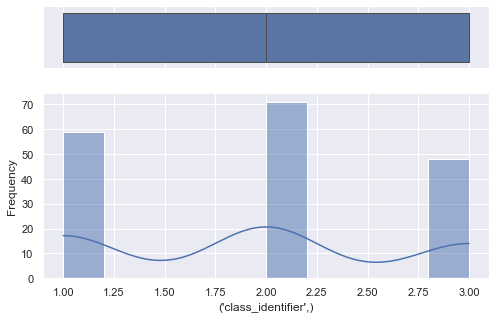

<Figure size 576x360 with 0 Axes>

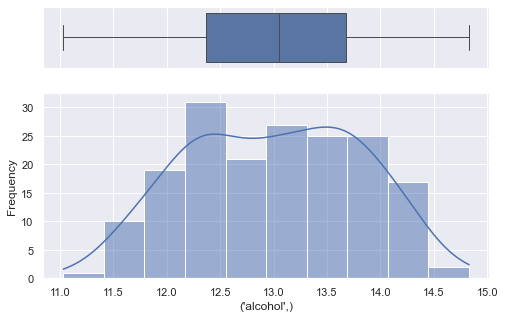

<Figure size 576x360 with 0 Axes>

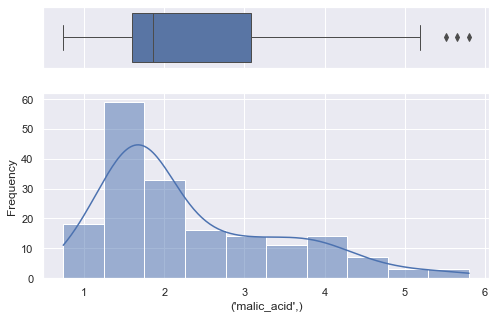

<Figure size 576x360 with 0 Axes>

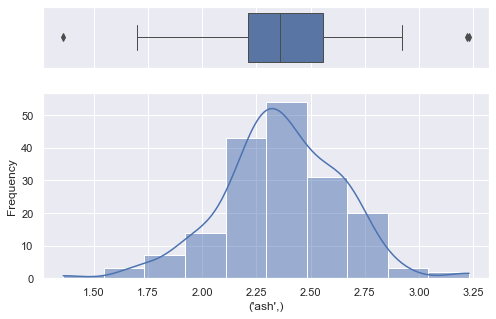

<Figure size 576x360 with 0 Axes>

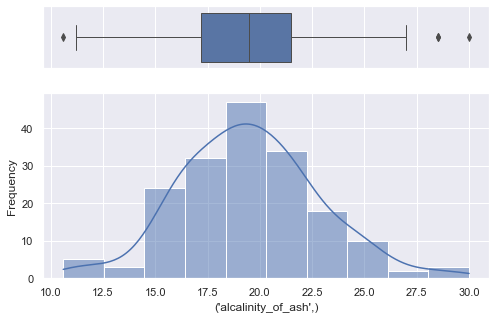

<Figure size 576x360 with 0 Axes>

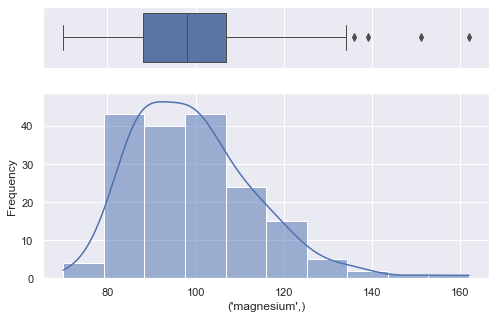

<Figure size 576x360 with 0 Axes>

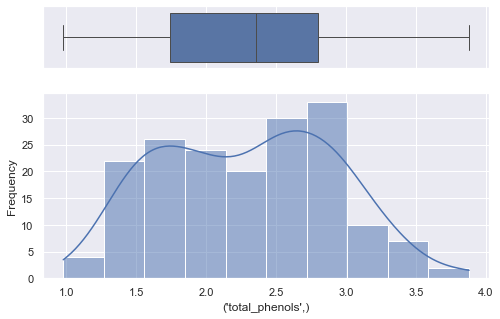

<Figure size 576x360 with 0 Axes>

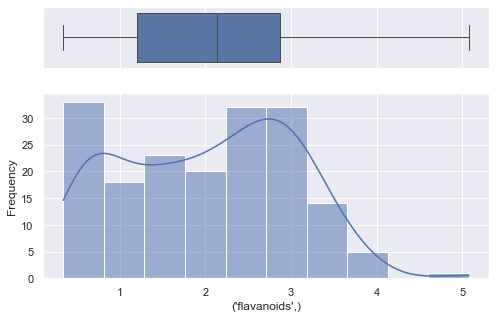

<Figure size 576x360 with 0 Axes>

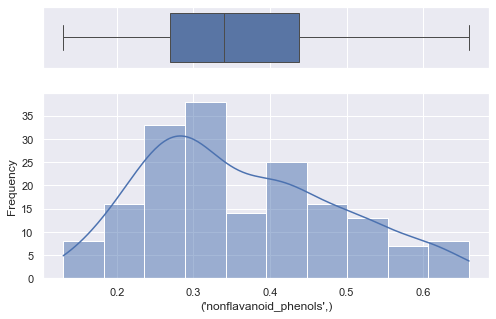

<Figure size 576x360 with 0 Axes>

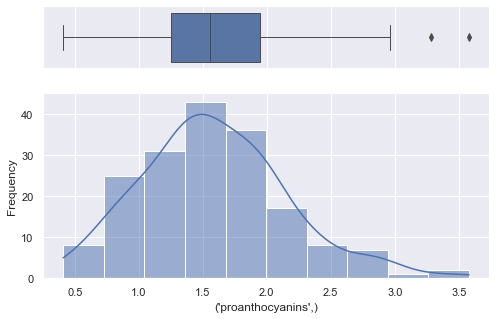

<Figure size 576x360 with 0 Axes>

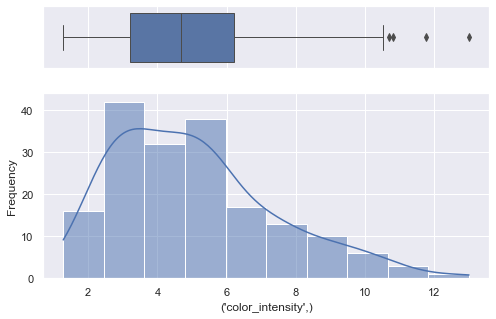

<Figure size 576x360 with 0 Axes>

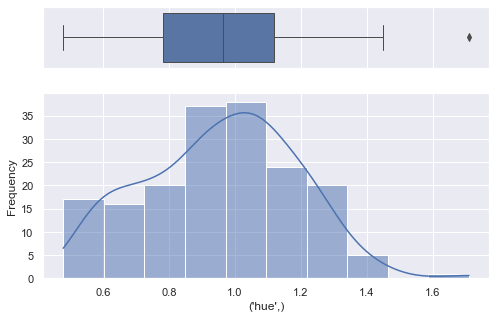

<Figure size 576x360 with 0 Axes>

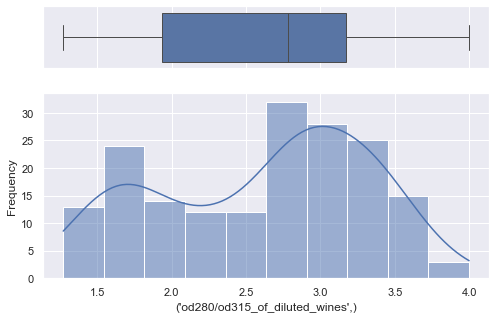

<Figure size 576x360 with 0 Axes>

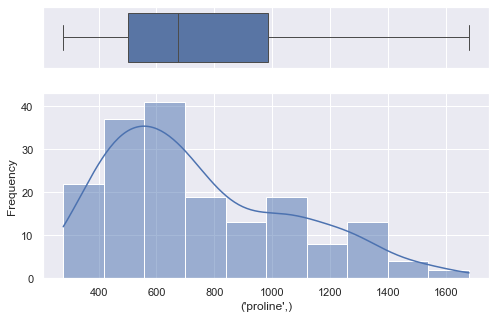

In [9]:
import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
    ax_box.set(xlabel='')


**NOTA:** Se identifican variables con **diferente escala**, así como algunas que contienen **outliers**. Es necesario realizar un pre-procesado de la data previo a trabajar con la misma. Además, se identifican posibles **distribuciones normales** para lo cual se realizará un test de hipótesis.

**3. PREPOCESSING THE DATA:**

#### 3.1. Standardization  
Se comprueba si realmente son distribuciones normales, previo realizar la estandarización de las siguientes variables:  
- 'ash'
- 'alcalinity_of_ash'
- 'proanthocyanins'

**Shapiro-Wilk Test**  
*Tests whether a data sample has a Gaussian distribution.*
  
**Ho:** Variable has a Gaussian distribution.  
**Ha:** Variable does not have a Gaussian distribution.

**Variable:** ash

In [10]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df.ash)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.984, p=0.039
Probably not Gaussian


**R:** Se rechaza Ho ya que p < 5%, por la tanto la variable **NO tiene una distribución normal.**

**Variable:** alcalinity_of_ash


In [11]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df.alcalinity_of_ash)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.990, p=0.264
Probably Gaussian


**R:** Se acepta Ho ya que p > 5%, por la tanto la variable **SI tiene una distribución normal.**

**Variable:** proanthocyanins

In [12]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df.proanthocyanins)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.981, p=0.014
Probably not Gaussian


**R:** Se rechaza Ho ya que p < 5%, por la tanto la variable **NO tiene una distribución normal.**

In [13]:
from sklearn.preprocessing import StandardScaler

standColumns = ['alcalinity_of_ash']
scalerStand = StandardScaler().fit(df[standColumns])
df[standColumns] = scalerStand.transform(df[standColumns])

#### 3.2 Normalization

Se identificaron variables con outliers, en este caso se realizará un **RobustScaler**, para las demás simplemente un **MinMaxScaler**

**RobustScaler:**

In [14]:
from sklearn.preprocessing import RobustScaler

robustColumns = ['malic_acid', 'ash', 'alcalinity_of_ash', 
                 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
scalerRobust = RobustScaler().fit(df[robustColumns])
df[robustColumns] = scalerRobust.transform(df[robustColumns])

**MinMaxScaler:**

In [15]:
from sklearn.preprocessing import MinMaxScaler

normColumns = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 
               'od280/od315_of_diluted_wines', 'proline']
scalerNorm = MinMaxScaler().fit(df[normColumns])
df[normColumns] = scalerNorm.transform(df[normColumns])

**4. TRAIN / TEST SPLIT:**

In [16]:
X = df.drop(['class_identifier'],axis=1)
y = df['class_identifier'] #Target

print("Shape X:", X.shape,"\nShape y:", y.shape)

Shape X: (178, 13) 
Shape y: (178, 1)


- La evaluación, se realiza dividiendo los datos de la siguiente manera: 80% Train y 20% Test.

In [17]:
# train-test split evaluation 
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)

Shape X_train: (142, 13) 
Shape X_test: (36, 13) 
Shape y_train: (142, 1) 
Shape y_test: (36, 1)


## <span style=color:red><b>Ejercicio 1</b></span>
<span style=color:blue><b><i>Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.</i></b></span>

**5. CREATE MODELS**

In [18]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [19]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=42)

**5.1. MODEL FITTING**

In [21]:
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

**5.2. PREDICTION**

In [22]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

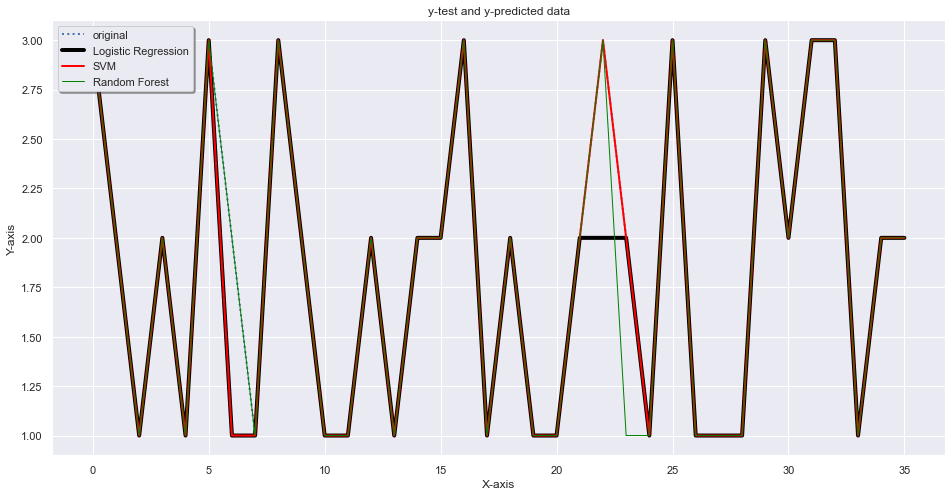

In [23]:
plt.figure(figsize = (16,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", ls=":")
plt.plot(x_ax, y_pred_lr, linewidth=4., label="Logistic Regression", c="black")
plt.plot(x_ax, y_pred_svc, linewidth=2, label="SVM", c="red")
plt.plot(x_ax, y_pred_rf, linewidth=1, label="Random Forest", c="green")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6. EVALUATE**

## <span style=color:red><b>Ejercicio 2</b></span>
<span style=color:blue><b><i>Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confianza y otras métricas más avanzadas.</i></b></span>

**6.1. Accuracy**

In [24]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [25]:
results = pd.DataFrame({'Model': ['Logistic Regression', 'SVM','Random Forest'],
                        'accuracy': [acc_lr, acc_svc, acc_rf]})
results

,Model,accuracy
0,Logistic Regression,0.944444
1,SVM,0.972222
2,Random Forest,0.972222


- ***De manera general los 3 modelos utilizados tienen un buen "ACCURACY", siendo los modelos de SVM y Random Forest los mejores, con un 97,2 % de precisión en la predicción de los resultados.***

**6.2. Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

[Text(0.5, 1.0, 'Confusion matrix for LR')]

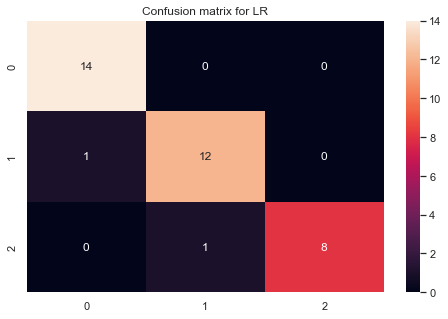

In [27]:
sns.heatmap(cf_matrix_lr, annot=True).set(title='Confusion matrix for LR')

- ***El modelo LR, predice valores como falsos negativos de las clases 2 y 3.***

[Text(0.5, 1.0, 'Confusion matrix for SVC')]

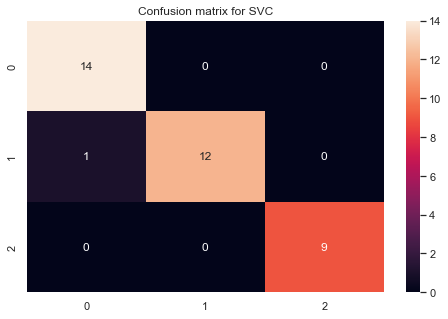

In [28]:
sns.heatmap(cf_matrix_svc, annot=True).set(title='Confusion matrix for SVC')

- ***El modelo SVM, predice valores como falsos negativos apenas para la clase 2, los demás los predice correctamente.***

[Text(0.5, 1.0, 'Confusion matrix for RF')]

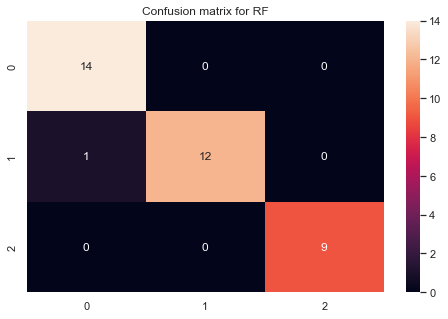

In [29]:
sns.heatmap(cf_matrix_rf, annot=True).set(title='Confusion matrix for RF')

- ***El modelo Randondm Forest, es similar al SVM, predice valores como falsos negativos apenas para la clase 2, los demás los predice correctamente.***

**6.3. F1 score**

In [30]:
from sklearn.metrics import f1_score

#'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

In [31]:
results['f1_macro'] = [f1_lr, f1_svc, f1_rf]
results

,Model,accuracy,f1_macro
0,Logistic Regression,0.944444,0.943257
1,SVM,0.972222,0.975172
2,Random Forest,0.972222,0.975172


- ***Los valores de F1, representan el % de predicciones positivas correctas, por lo tanto analizando los valores se puede concluir:***  
    - Los resultados obtenidos son muy similares al accuracy de cada modelo.
    - Se observa que el valor de F1 disminuye en comparación al accuracy, para el modelo de Logistic Regression (0.944 > 0.943) debido a que este modelo presenta más predicciones incorrectas.
    - Se ratifica que los modelos SVM y Random Forest presentan resultados similares y mejores con un 97.5 %.

**7. CROSS VALIDATION (without hyperparameters)**  

In [34]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'f1_macro'] #use cross_validate for multiple metrics for evaluation.


cv_lr = cross_validate(lr, X, y, cv=5, scoring=scoring)
cv_svc = cross_validate(svc, X, y, cv=5, scoring=scoring)
cv_rf = cross_validate(rf, X, y, cv=5, scoring=scoring)

results['acc_cv'] = [cv_lr['test_accuracy'].mean(), cv_svc['test_accuracy'].mean(), cv_rf['test_accuracy'].mean()]

results['f1_macro_cv'] = [cv_lr['test_f1_macro'].mean(), cv_svc['test_f1_macro'].mean(), cv_rf['test_f1_macro'].mean()]

results

,Model,accuracy,f1_macro,acc_cv,f1_macro_cv
0,Logistic Regression,0.944444,0.943651,0.943651,0.945993
1,SVM,0.972222,0.955079,0.955079,0.955034
2,Random Forest,0.972222,0.966508,0.966508,0.967056


- ***Realizando un cross validation previo a mejorar los parámetros, ve observa que el modelo que mejor se desempeña en la predicción es el de Random Forest con un accuracy = 96.7% y f1_marco = 96.71%. Es importante verificar los resultados que se pueden obtener mediante hyperparameters, y de igual manera realizar un cross validation.***

## <span style=color:red><b>Ejercicio 3</b></span>
<span style=color:blue><b><i>Entrenarlos utilizando los diferentes parámetros que se admiten para intentar mejorar su predicción.</i></b></span>

**8. TUNING THE HYPER-PARAMETERS OF AN ESTIMATOR**  

https://scikit-learn.org/stable/modules/grid_search.html# 

**MODEL 1:**

In [65]:
#Estimator
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [83]:
#Parameter search
from sklearn.model_selection import GridSearchCV

#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid['penalty'] = ["l1", "l2", "elasticnet"]

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used, by default cv = 5. 

search = GridSearchCV(lr, param_grid, scoring = 'f1_macro')

search.fit(X_train, y_train)

print("Best Hyper-parameters: ", search.best_params_)

Best Hyper-parameters:  {'penalty': 'l1', 'solver': 'saga'}


**MODEL 2:**

In [49]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [84]:
#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid2 = dict()
param_grid2['kernel'] = ["linear", "rbf"]
param_grid2['decision_function_shape'] = ["ovo", "ovr"]
param_grid2['random_state'] = [1, 42]

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used, by default cv = 5. 

search2 = GridSearchCV(svc, param_grid2, scoring = 'f1_macro')

search2.fit(X_train, y_train)

print("Best Hyper-parameters: ", search2.best_params_)

Best Hyper-parameters:  {'decision_function_shape': 'ovo', 'kernel': 'linear', 'random_state': 1}


**MODEL 3:**

In [73]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [85]:
#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid3 = dict()
param_grid3['max_depth'] = [None, 2, 3, 5]
param_grid3['n_estimators'] = [50, 75, 100, 125, 150, 175, 200]
param_grid3['oob_score'] = [True, False]

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used, by default cv = 5. 

search3 = GridSearchCV(rf, param_grid3, scoring = 'f1_macro')

search3.fit(X_train, y_train)

print("Best Hyper-parameters: ", search3.best_params_)

Best Hyper-parameters:  {'max_depth': None, 'n_estimators': 50, 'oob_score': True}


- **Predicciones de los modelos con los hyperparámetros correspondientes**

In [86]:
y_pred_lr_hp = search.predict(X_test)
y_pred_svc_hp = search2.predict(X_test)
y_pred_rf_hp = search3.predict(X_test)

#accuracy
acc_lr_hp = accuracy_score(y_test, y_pred_lr_hp) 
acc_svc_hp = accuracy_score(y_test, y_pred_svc_hp) 
acc_rf_hp = accuracy_score(y_test, y_pred_rf_hp) 

#f1_macro
f1_lr_hp = f1_score(y_test, y_pred_lr_hp, average='macro') 
f1_svc_hp = f1_score(y_test, y_pred_svc_hp, average='macro') 
f1_rf_hp = f1_score(y_test, y_pred_rf_hp, average='macro') 

In [87]:
results['acc_hp'] = [acc_lr_hp, acc_svc_hp, acc_rf_hp]
results['f1_macro_hp'] = [f1_lr_hp, f1_svc_hp, f1_rf_hp]
results

,Model,accuracy,f1_macro,acc_cv,f1_macro_cv,acc_hp,f1_macro_hp
0,Logistic Regression,0.944444,0.943651,0.943651,0.945993,0.944444,0.943257
1,SVM,0.972222,0.955079,0.955079,0.955034,0.972222,0.975172
2,Random Forest,0.972222,0.966508,0.966508,0.967056,0.972222,0.975172


**R:** Como observamos en la tabla de resultados, una vez aplicados los "Hyper-Parameters", se concluye lo siguiente:  
 - El modelo #1: Logistic Regression disminuye el valor f1_macro (valor más cercano a 1 es mejor), mientras que el accuracy lo mantiene.
 - El modelo #2 y #3: SVM y Random Forest, presentan una mejoría  del f1_macro, ambos con los mismos valores para las variables de evaluación de accuracy y f1_macro de 97.22% y 97.52% respectivamente.

## <span style=color:red><b>Ejercicio 4</b></span>
<span style=color:blue><b><i>Compara su rendimiento utilizando la aproximación train/test o utilizando todos los datos (validación interna).</i></b></span>

**9. CROSS VALIDATION (With hyperparameters)**   

In [88]:
scoring = ['accuracy', 'f1_macro'] #use cross_validate for multiple metrics for evaluation.

cv_lr_hp = cross_validate(search, X, y, cv=5, scoring=scoring)
cv_svc_hp = cross_validate(search2, X, y, cv=5, scoring=scoring)
cv_rf_hp = cross_validate(search3, X, y, cv=5, scoring=scoring)

results['acc_hp_cv'] = [cv_lr_hp['test_accuracy'].mean(), cv_svc_hp['test_accuracy'].mean(), cv_rf_hp['test_accuracy'].mean()]

results['f1_macro_hp_cv'] = [cv_lr_hp['test_f1_macro'].mean(), cv_svc_hp['test_f1_macro'].mean(), cv_rf_hp['test_f1_macro'].mean()]

results

,Model,accuracy,f1_macro,acc_cv,f1_macro_cv,acc_hp,f1_macro_hp,acc_hp_cv,f1_macro_hp_cv
0,Logistic Regression,0.944444,0.943651,0.943651,0.945993,0.944444,0.943257,0.938095,0.940349
1,SVM,0.972222,0.955079,0.955079,0.955034,0.972222,0.975172,0.955079,0.955034
2,Random Forest,0.972222,0.966508,0.966508,0.967056,0.972222,0.975172,0.966667,0.967337


- **Finalmente, luego de aplicar hiperparámetros y cross validation en los tres modelos, se concluye que el modelo con mejores resultados es RANDOM FOREST con un accuracy = 96.67% y un f1_macro = 96.73%.**

## <span style=color:red><b>Ejercicio 5</b></span>
<span style=color:blue><b><i>Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)</i></b></span>

- **En el paso #3. PREPOCESSING THE DATA, ya se realizaron procesos de ingeniería para mejorar los resultados, sin embargo en este punto se plantea realizar uno adicional para evaluar resultados.**  

- **Se verifica si existe correlación entre las variables para aplicar Polynomial Features**

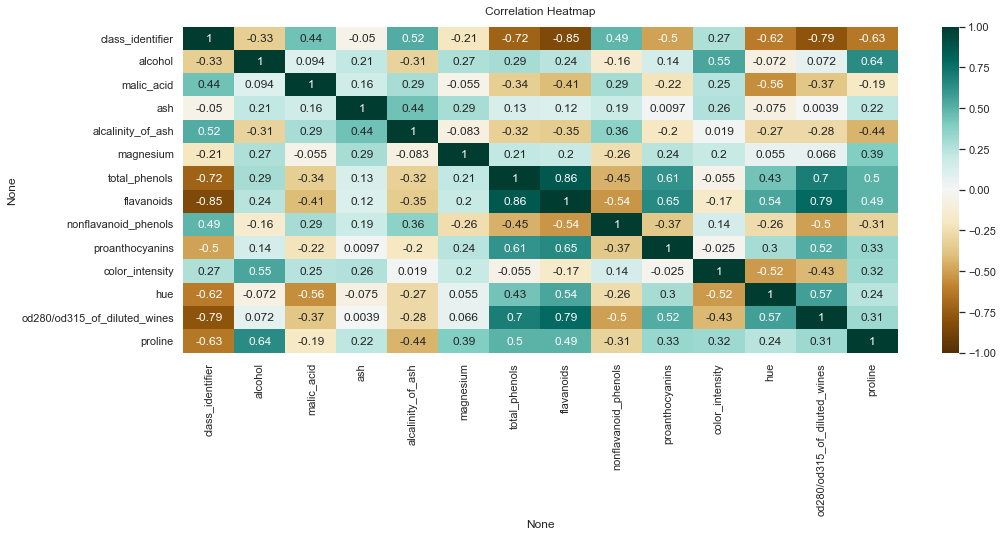

In [90]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- **Se realiza Polynomial Features dado que se comprueba correlaciones**

In [91]:
# visualize a polynomial features transform
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures

# retrieve just the numeric INPUT values (X)
data = X.values

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
X_Polynomial = trans.fit_transform(data)

# summarize
print(X_Polynomial.shape)

(178, 560)


- **Se utiliza los modelos con los hyperparametros obtenidos previamente, para predecir los resultados**

In [100]:
# split into train test sets
X_Poly_train, X_Poly_test, y_train, y_test = train_test_split(X_Polynomial, y, test_size=0.20, random_state=1)
print("Train and Test Sets Shapes:", X_Poly_train.shape, X_Poly_test.shape, y_train.shape, y_test.shape)


lr2 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
lr2.fit(X_Poly_train, y_train)

svc2 = SVC(decision_function_shape= 'ovo', kernel= 'linear', random_state=1)
svc2.fit(X_Poly_train, y_train)

rf2 = RandomForestClassifier(max_depth=None, n_estimators= 50, oob_score= True, random_state=42)
rf2.fit(X_Poly_train, y_train)

y_pred_lr_hp2 = lr2.predict(X_Poly_test)
y_pred_svc_hp2 = svc2.predict(X_Poly_test)
y_pred_rf_hp2 = rf2.predict(X_Poly_test)

#accuracy
acc_lr_hp2 = accuracy_score(y_test, y_pred_lr_hp2) 
acc_svc_hp2 = accuracy_score(y_test, y_pred_svc_hp2) 
acc_rf_hp2 = accuracy_score(y_test, y_pred_rf_hp2) 

#f1_macro
f1_lr_hp2 = f1_score(y_test, y_pred_lr_hp2, average='macro') 
f1_svc_hp2 = f1_score(y_test, y_pred_svc_hp2, average='macro') 
f1_rf_hp2 = f1_score(y_test, y_pred_rf_hp2, average='macro') 

print(acc_lr_hp2, f1_lr_hp2)
print(acc_svc_hp2, f1_svc_hp2)
print(acc_rf_hp2, f1_rf_hp2)

Train and Test Sets Shapes: (142, 560) (36, 560) (142, 1) (36, 1)
0.9444444444444444 0.9432568783481562
0.9444444444444444 0.9432568783481562
0.9722222222222222 0.9751724137931035


- **Se comprueba que no existe ninguna mejoría utilizando Polynomial Features, es más en el caso del modelo SVM los resultados empeoran, en relación a los obtenidos anteriormente**